In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Funciones para calculos del EDA

In [4]:
class funciones_EDA:
    '''
    Autor: https://github.com/idaroga - Fecha: 16-sept-2023
    '''
    def __init__(self):
        # El método __init__ es el constructor de la clase
        pass

    def _1_view_df_info(self, df:pd.DataFrame):
        '''
        Obtener los tipos de datos, la cantidad por cada uno y el porcentaje de valores nulos para cada columna de un dataframe.
        Recibe como parámetro un dataframe.
        Autor: https://github.com/idaroga - Fecha: 16-sept-2023
        '''

        # Calcular el conteo duplicados por columna
        df_duplicados = df.apply(lambda col: col.duplicated().sum()).reset_index()     # duplicados por columna
        df_duplicados.rename(columns={"index": "Column", 0: "Duplicados"}, inplace=True) # renombrar columnas para union
        # df_merge = pd.merge(df_merge, df_3, on=columna_union, how='left')

        # Agregar columna con el conteo unicos por columna
        df_unicos = df.apply(lambda col: col.nunique()).reset_index()     # valores unicos por columna
        df_unicos.rename(columns={"index": "Column", 0: "Unicos"}, inplace=True) # renombrar columnas para union
        df_merge = pd.merge(df_duplicados, df_unicos, on="Column", how='left')

        # Agregar una columna con el conteno de nulos por columna
        df_nulos = df.isnull().sum()  # Hallamos los valores nulos y se almacenan en una serie
        df_nulos = df_nulos.reset_index()  # Convierte el índice en una columna
        df_nulos.columns = ['Column', 'Nulos']  # Asigna un nombre a la columna del índice si es necesario
        df_merge = pd.merge(df_merge, df_nulos, on="Column", how='left')

        # agregar columna de porcentaje nulos
        df_merge["%_nulos"] = round(df_merge["Nulos"] / df.shape[0] * 100, 2)  # Porcentaje total de registros nulos

        # Agregar columna con los tiposde datos y su conteo
        df_result = df.apply(lambda col: col.apply(type).value_counts())  # Aplicar la función a todas las columnas del DataFrame
        df_result = df_result.T.reset_index()  # Transponer el resultado y restablecer el índice
        df_result.columns = ["Column"] + df_result.columns[1:].tolist()  # Renombrar las columnas
        df_merge = pd.merge(df_merge, df_result, on="Column", how='left')

        print("total filas: ", df.shape[0])
        print("total columnas: ", df.shape[1])
        print("filas completamente nulas: ", df.isna().all(axis=1).sum())  # Filas que se encuentran totalmente en nulo
        print("filas totalmente duplicadas:", len(df[df.duplicated()]))
        print("-------------------------------------------------------------")

        # estadisticas generales
        print("\n", df.describe())
        print("-------------------------------------------------------------")

        return df_merge
    
    def _2_view_duplicates(self, df:pd.DataFrame, col:str, valor=""):
        '''
        Obtener los registros donde hay valores duplicados para una columna.
        Recibe como parámetro un dataframe, el nombre de una columna y si quiere el valor duplicado encontrado.
        Autor: https://github.com/idaroga - Fecha: 16-sept-2023
        '''
        valor = str(valor)
        if valor == "":
            filtro = df[df.duplicated(subset=[col], keep=False)]
        else:
            filtro = df[df[col].astype(str) == valor]
        return filtro
 
    def _3_view_data_by_types(self, df:pd.DataFrame, columna=""):
    
        '''
        Obtener el tipo de datos que maneja cada columna e imprimir los valores unicos de cada tipo.
        Recibe como parámetro un dataframe y si quiere una columna en particular.
        Autor: https://github.com/idaroga - Fecha: 16-sept-2023
        '''
        lista_columnas = df.columns.tolist()
        if columna == "":
            for indice in range (0, len(lista_columnas)):
                print("NOMBRE COLUMNA: ", df.columns[indice])
                self.__view_data__(df, df.columns[indice])
                print("-------------------------------------------------------------")
        else:
            indice = lista_columnas.index(columna)
            self.__view_data__(df, df.columns[indice])

    def _4_view_order_values(self, df:pd.DataFrame, col:str):
        '''
        Retornar una lista de valores únicos de tipo str de una columna ordenados alfabéticamente.
        Se utiliza para revisar la sintaxis, estructura y formato de los datos de una columna.
        Recibe como parámetro un dataframe y el nombre de la columna.
        Autor: https://github.com/idaroga - Fecha: 16-sept-2023
        '''
        # Obtener los valores únicos de la columna
        valores_unicos = df[col].unique()

        # Filtrar y ordenar alfabéticamente los valores únicos de tipo str
        valores_str_ordenados = sorted([valor for valor in valores_unicos if isinstance(valor, str)])

        return valores_str_ordenados

    def _5_view_unique_value_percent(self, df:pd.DataFrame, columna=""):
        '''
        Obtener el porcentaje que representa cada valor unico en una columna.
        Recibe como parámetro un dataframe y si quiere una columna en particular.
        Autor: https://github.com/idaroga - Fecha: 16-sept-2023
        '''
        if columna == "":
            lista_de_columnas = df.columns.tolist()
            for col in lista_de_columnas:
                columna = df[col]

                # Porcentaje que representa cada valor dato respecto a toda la columna
                conteo_datos = columna.value_counts()
                total_datos = len(columna)
                porcentaje_victimas = round((conteo_datos / total_datos) * 100, 2)

                # Combina los resultados en un nuevo DataFrame
                resultados = pd.DataFrame({"Cantidad": conteo_datos, "Porcentaje (%)": porcentaje_victimas})
                
                # y deseas ordenarlo de manera descendente según la columna "Cantidad"
                resultados = resultados.sort_values(by="Cantidad", ascending=False)

                print(resultados)
                print("-------------------------------------------------------------")
        else:
            columna = df[columna]

            # Porcentaje que representa cada valor dato respecto a toda la columna
            conteo_datos = columna.value_counts()
            total_datos = len(columna)
            porcentaje_victimas = round((conteo_datos / total_datos) * 100, 2)

            # Combina los resultados en un nuevo DataFrame
            resultados = pd.DataFrame({"Cantidad": conteo_datos, "Porcentaje (%)": porcentaje_victimas})
            
            # y deseas ordenarlo de manera descendente según la columna "Cantidad"
            resultados = resultados.sort_values(by="Cantidad", ascending=False)

            print(resultados)

    def __view_data__(self, df:pd.DataFrame, col:str):    
        '''
        Obtener el tipo de datos que maneja una columna e imprimir los valores unicos de cada tipo.
        Recibe como parámetro un dataframe y el nombre de la columna.
        Autor: https://github.com/idaroga - Fecha: 16-sept-2023
        '''
        columna = df[col]
        # Crear una lista para almacenar los resultados
        tipos_de_datos = columna.apply(type).unique()

        for tipo in tipos_de_datos:
            resultados = []
            filtro = columna.apply(lambda x: isinstance(x, tipo))
            total_valores = filtro.sum()
            valores_unicos = columna[filtro].unique()
            porcentaje_col = str(round(total_valores / len(columna) * 100, 2)) + "%"
            porcentaje_tipo = str(round(len(valores_unicos) / total_valores * 100, 2)) + "%"

            # Agregar los resultados a la lista
            resultados.append([tipo, total_valores, porcentaje_col, len(valores_unicos), porcentaje_tipo])

            # Crear un DataFrame con los resultados
            resultado_df = pd.DataFrame(resultados, columns=['Tipo Dato', 'Cant. Valores', '% en Columna', 'Cant. Val. Únicos', '% de únicos'])

            print(resultado_df.T)
            print()
            print(f'Valores únicos: {valores_unicos}')
            print('\n')

In [2]:
# Reemplaza 'Alternative fuel Vehicles US.csv' con la ubicación real de tu archivo CSV.
ruta_archivo = 'ElectricCarData_Norm.csv'

# Cargar el archivo CSV en un DataFrame
df_Elec_Car = pd.read_csv(ruta_archivo)

In [3]:
# Verificar campos NaN en el DataFrame
nan_counts = df_Elec_Car.isnull().sum()
print("Valores NaN por columna:")
print(nan_counts)


Valores NaN por columna:
Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
dtype: int64


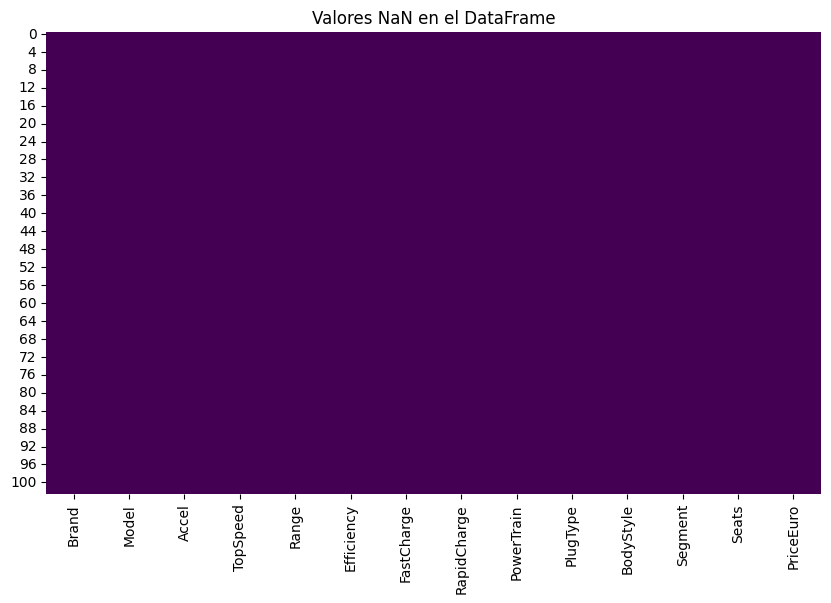

In [4]:
# Crear un mapa de calor para visualizar los NaN
plt.figure(figsize=(10, 6))
sns.heatmap(df_Elec_Car.isnull(), cbar=False, cmap='viridis')
plt.title('Valores NaN en el DataFrame')
plt.show()


MAPA VACIO, PUES NO TENEMOS NaN

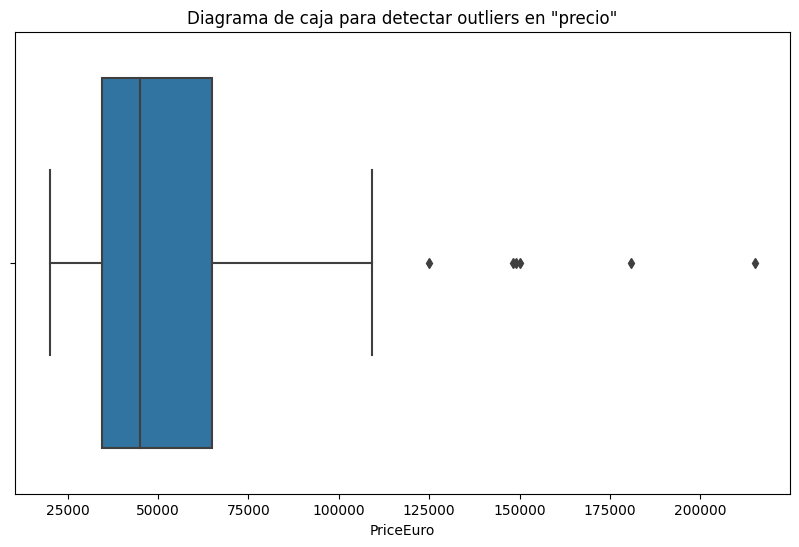

In [6]:
'''
Se visualiza una información sin outliers, pues los datos fuera de rango son perfectamente normales
pues son vehiculos de alta gama
'''

# Detectar y visualizar outliers en la columna 'precio'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_Elec_Car['PriceEuro'])
plt.title('Diagrama de caja para detectar outliers en "precio"')
plt.show()


Filas duplicadas:
Empty DataFrame
Columns: [Brand, Model, Accel, TopSpeed, Range, Efficiency, FastCharge, RapidCharge, PowerTrain, PlugType, BodyStyle, Segment, Seats, PriceEuro]
Index: []


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


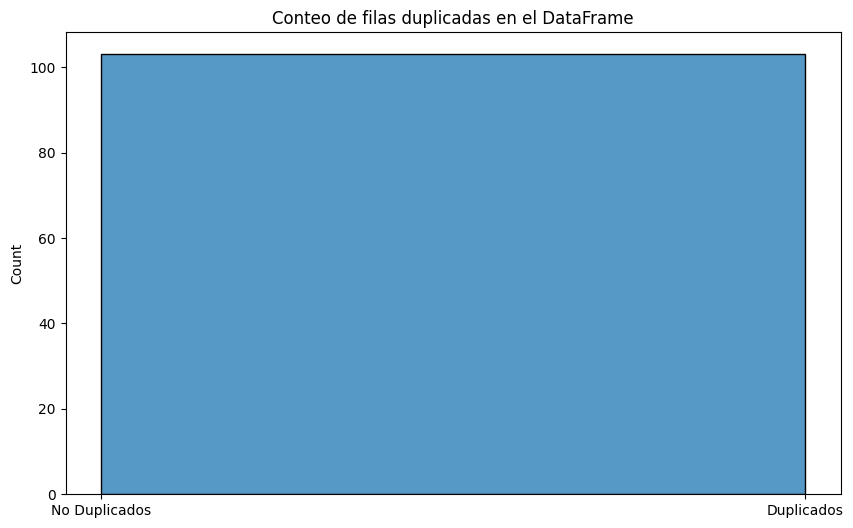

In [7]:
# Verificar valores duplicados en el DataFrame
duplicates = df_Elec_Car[df_Elec_Car.duplicated()]
print("Filas duplicadas:")
print(duplicates)

# Histograma para contar filas duplicadas
plt.figure(figsize=(10, 6))
sns.histplot(df_Elec_Car.duplicated(), bins=[0, 1], kde=False)
plt.xticks([0, 1], ['No Duplicados', 'Duplicados'])
plt.title('Conteo de filas duplicadas en el DataFrame')
plt.show()


ES UNA INFORMACION SIN DUPLICADOS, 

Verificamos las columnas para seleccionar la información relevante de acuerdo al alcance del Proyecto

In [7]:
# Nombre de las columnas
print(df_Elec_Car.columns)


Index(['Brand', 'Model', 'Accel', 'TopSpeed', 'Range', 'Efficiency',
       'FastCharge', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle',
       'Segment', 'Seats', 'PriceEuro'],
      dtype='object')


Información de Carros eléctricos bastante depurada, sin outliers, ni NaN, ni campos vacios, sin embargo hay información que no es necesaria para el alcance del proyecto, la siguiente es la que se considera relevante:

Efficiency (Eficiencia): La eficiencia es crucial para maximizar el rango de conducción por carga, lo que puede ayudar a reducir costos operativos y aumentar la productividad del taxi.

Range (Autonomía): Una mayor autonomía permite que el taxi eléctrico pueda realizar más viajes antes de necesitar recargarse, lo que es esencial en una ciudad como Nueva York, donde los taxis pueden estar en servicio continuamente.

FastCharge (Carga Rápida): La capacidad de carga rápida es importante para minimizar el tiempo de inactividad del taxi durante la recarga, lo que es crítico para mantener la operación eficiente.

Price (Precio): El precio del vehículo eléctrico es una consideración importante para los propietarios de flotas de taxis, ya que afecta directamente a la inversión inicial.

Brand y Model (Marca y Modelo): La reputación de la marca y el modelo del vehículo puede influir en la percepción de los clientes y la confiabilidad del vehículo y adicionalmente en el mantenimiento y respaldo en repuestos.

In [8]:
eda = funciones_EDA()
info_df = eda._1_view_df_info(df_Elec_Car)
duplicates = eda._2_view_duplicates(df_Elec_Car, "Brand")
eda._3_view_data_by_types(df_Elec_Car)
unique_values = eda._4_view_order_values(df_Elec_Car, "Brand")
percentages = eda._5_view_unique_value_percent(df_Elec_Car, "Brand")


total filas:  103
total columnas:  14
filas completamente nulas:  0
filas totalmente duplicadas: 0
-------------------------------------------------------------

             Seats      PriceEuro
count  103.000000     103.000000
mean     4.883495   55811.563107
std      0.795834   34134.665280
min      2.000000   20129.000000
25%      5.000000   34429.500000
50%      5.000000   45000.000000
75%      5.000000   65000.000000
max      7.000000  215000.000000
-------------------------------------------------------------
NOMBRE COLUMNA:  Brand
                               0
Tipo Dato          <class 'str'>
Cant. Valores                103
% en Columna              100.0%
Cant. Val. Únicos             33
% de únicos               32.04%

Valores únicos: ['Tesla ' 'Volkswagen ' 'Polestar ' 'BMW ' 'Honda ' 'Lucid ' 'Peugeot '
 'Audi ' 'Mercedes ' 'Nissan ' 'Hyundai ' 'Porsche ' 'MG ' 'Mini ' 'Opel '
 'Skoda ' 'Volvo ' 'Kia ' 'Renault ' 'Mazda ' 'Lexus ' 'CUPRA ' 'SEAT '
 'Lightyear ' 'Aiways

TOP 5 DE LOS CARROS MAS ECONÓMICOS, SIN EMBARGO SU RANGE NO ES EL OPTIMO DADO QUE EL PROMEDIO DE KILOMETRAJE POR DIA EN NYC ES DE 200 A 300 KILOMETROS

POR TAL RAZÓN ES MEJOR UN CARRO DE MAYOR RANGE Y MEJOR RESPALDO

In [9]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Ordenar el DataFrame df_Elec_Car por la columna "PriceEuro" de menor a mayor
df_Elec_Car = df_Elec_Car.sort_values(by="PriceEuro")

# Mostrar el DataFrame ordenado
print(df_Elec_Car.head(5))



          Brand            Model     Accel  TopSpeed   Range Efficiency   
44        SEAT     Mii Electric   12.3 sec  130 km/h  195 km  166 Wh/km  \
82       Smart   EQ fortwo coupe  11.6 sec  130 km/h  100 km  167 Wh/km   
17  Volkswagen            e-Up!   11.9 sec  130 km/h  195 km  166 Wh/km   
77       Smart       EQ forfour   12.7 sec  130 km/h   95 km  176 Wh/km   
43       Skoda       CITIGOe iV   12.3 sec  130 km/h  195 km  166 Wh/km   

   FastCharge                  RapidCharge         PowerTrain    PlugType   
44   170 km/h      Rapid charging possible  Front Wheel Drive  Type 2 CCS  \
82          -  Rapid charging not possible   Rear Wheel Drive      Type 2   
17   170 km/h      Rapid charging possible  Front Wheel Drive  Type 2 CCS   
77          -  Rapid charging not possible   Rear Wheel Drive      Type 2   
43   170 km/h      Rapid charging possible  Front Wheel Drive  Type 2 CCS   

    BodyStyle Segment  Seats  PriceEuro  
44  Hatchback       A      4      20129  
82

In [10]:
# Vehiculos tipo Sedan valor menor a 60000, dado que son los taxis
# mas tradicionales en NYC

# Valor de referencia y Sedan
valor_referencia = 60000

# Filtrar y ordenar las filas con "PriceEuro" menores al valor de referencia y "BodyStyle" igual a "Hatchback"
df_ordenado = df_Elec_Car[(df_Elec_Car["PriceEuro"] < valor_referencia) & (df_Elec_Car["BodyStyle"] == "Sedan")].sort_values(by="PriceEuro", ascending=False)

# Mostrar el DataFrame ordenado
print(df_ordenado.head(10))


    Brand                          Model    Accel  TopSpeed   Range   
0  Tesla   Model 3 Long Range Dual Motor  4.6 sec  233 km/h  450 km  \
8  Tesla     Model 3 Standard Range Plus  5.6 sec  225 km/h  310 km   

  Efficiency FastCharge              RapidCharge        PowerTrain   
0  161 Wh/km   940 km/h  Rapid charging possible   All Wheel Drive  \
8  153 Wh/km   650 km/h  Rapid charging possible  Rear Wheel Drive   

     PlugType BodyStyle Segment  Seats  PriceEuro  
0  Type 2 CCS     Sedan       D      5      55480  
8  Type 2 CCS     Sedan       D      5      46380  


In [11]:
# Vehiculos tipo Sedan valor menor a 35000, dado que son los 
# mas versatiles y economicos para una ciudad como NYC

# Valor de referencia Y Hatchback
valor_referencia = 35000

# Filtrar y ordenar las filas con "PriceEuro" menores al valor de referencia y "BodyStyle" igual a "Hatchback"
df_ordenado = df_Elec_Car[(df_Elec_Car["PriceEuro"] < valor_referencia) & (df_Elec_Car["BodyStyle"] == "Hatchback")].sort_values(by="PriceEuro", ascending=False)

# Mostrar el DataFrame ordenado
print(df_ordenado.head(5))


          Brand           Model    Accel  TopSpeed   Range Efficiency   
85        Fiat   500e Hatchback  9.0 sec  150 km/h  250 km  168 Wh/km  \
38     Renault    Zoe ZE50 R135  9.5 sec  140 km/h  310 km  168 Wh/km   
26  Volkswagen         ID.3 Pro  9.0 sec  160 km/h  350 km  166 Wh/km   
4        Honda               e   9.5 sec  145 km/h  170 km  168 Wh/km   
6   Volkswagen          e-Golf   9.6 sec  150 km/h  190 km  168 Wh/km   

   FastCharge              RapidCharge         PowerTrain    PlugType   
85   330 km/h  Rapid charging possible  Front Wheel Drive  Type 2 CCS  \
38   230 km/h  Rapid charging possible  Front Wheel Drive  Type 2 CCS   
26   490 km/h  Rapid charging possible   Rear Wheel Drive  Type 2 CCS   
4    190 km/h  Rapid charging possible   Rear Wheel Drive  Type 2 CCS   
6    220 km/h  Rapid charging possible  Front Wheel Drive  Type 2 CCS   

    BodyStyle Segment  Seats  PriceEuro  
85  Hatchback       B      4      34900  
38  Hatchback       B      5      3313

COLUMNAS A ELIMINAR DADO QUE NO HACEN PARTE DEL ALCANCE DEL PROYECTO

SE GUARDA LA INFORMACION SELECCIONADA EN EL ARCHIVO carros_electricos.csv

In [12]:
columns_to_drop = ["Accel", "TopSpeed", "RapidCharge", "PowerTrain","PlugType","Segment","Seats"]
df_Elec_Car = df_Elec_Car.drop(columns=columns_to_drop)

# Guardar el DataFrame en un archivo CSV
df_Elec_Car.to_csv("carros_electricos_limpio.csv", index=False)
